__собираем статистики по объявлениям о продаже земли__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
!date

Пт 14 июн 2024 14:47:37 MSK


# загружаем данные

In [2]:
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_pickle('data/2024/df_land.pkl')
df['dt'] = df['ts'].dt.date
display( len(df) )
cols = ['title','address','latitude','longitude','priceM','dt']
display( df.sample(3)[cols] )

17795

title  \
10141    участок 1,5 га (снт, днп)   
12823  участок 7,5 сот. (снт, днп)   
7346     участок 8 сот. (снт, днп)   

                                                     address   latitude  \
10141                                  бахчисарай,с.долинное  44.753761   
12823   севастополь,пос.кача,садоводческое товарищество маяк  44.793785   
7346   севастополь,садоводческое товарищество балаклавец,131  44.512792   

       longitude  priceM          dt  
10141  33.775442    0.01  2024-06-10  
12823  33.539706    1.30  2024-06-13  
7346   33.528756    4.50  2024-06-10

---

In [4]:
df_ = pd.read_pickle('data/2023/data_land.pkl').rename(columns={'adr':'address'})
df_['dt'] = df_['ts'].dt.date
display( len(df_) )
display( df_.sample(3)[cols] )

18854

title                                       address  \
16462  Участок 24 сот. (ИЖС)             Севастополь,ул. Генерала Жидилова   
518     Участок 4 сот. (ИЖС)               Севастополь,Предместная ул., 51   
5673   Участок 10 сот. (ИЖС)  Севастополь,с. Песчаное, ул. Верхний Городок   

        latitude  longitude  priceM          dt  
16462  44.604604  33.573968    4.50  2023-01-10  
518    44.567659  33.576582    5.80  2022-09-08  
5673   44.855548  33.626349    2.80  2022-09-19

In [5]:
df_ = (
        df_
        .dropna(subset=['dt','url'])
        .drop_duplicates(['dt','url'])
        .drop(columns=['adr_orig','obj_name','avito_page'])
    )
display( len(df_) )
cols = ['title','address','latitude','longitude','priceM','dt','url']
display( df_.sample(3)[cols] )

18727

title                                    address  \
5552   Участок 8 сот. (ИЖС)        Севастополь,с. Орловка, Озёрная ул.   
968   Участок 10 сот. (ИЖС)  Севастополь,Нахимовский район , Любимовка   
1776   Участок 5 сот. (ИЖС)            Севастополь,Мореходная ул., 163   

       latitude  longitude  priceM          dt                          url  
5552  44.729944  33.564374    3.20  2022-09-19  https://avito.ru/2274995139  
968    44.66734  33.548725    3.30  2022-09-08  https://avito.ru/2423549122  
1776  44.613582  33.560367    2.70  2022-09-12  https://avito.ru/2373253319

In [6]:
# df_['dt'].drop_duplicates()

In [7]:
# history_date = df_['dt'].max()
history_date = pd.to_datetime('2023-01-10').date()
display(history_date)

datetime.date(2023, 1, 10)

In [8]:
df = pd.concat([df,df_]).reset_index(drop=True)
display( len(df) )
del df_

36522

In [9]:
import numpy as np
df['log_priceM'] = df['priceM'].apply(lambda x: np.log(x+1.))

---

In [10]:
# df['dt'].drop_duplicates().sort_values()

In [11]:
# display( len(df) )
# df = df[ df['dt']!=pd.to_datetime('2024-06-04').date() ]
# display( len(df) )
# df = df[ df['dt']!=pd.to_datetime('2024-06-05').date() ]
# display( len(df) )
# df = df.reset_index(drop=True)

In [12]:
df['month'] = df['ts'].dt.to_period('M')

In [13]:
df['week'] = df['ts'].dt.to_period('W')

---

In [14]:
df['latitude'] = pd.to_numeric( df['latitude'], errors='coerce' )
df['longitude'] = pd.to_numeric( df['longitude'], errors='coerce' )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36522 entries, 0 to 36521
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   url                 36522 non-null  object        
 1   place               36522 non-null  object        
 2   title               36522 non-null  object        
 3   subtitle            6627 non-null   object        
 4   price               36522 non-null  int64         
 5   address             36522 non-null  object        
 6   description         36522 non-null  object        
 7   ts                  36522 non-null  datetime64[ns]
 8   area                36522 non-null  float64       
 9   is_IJS              36522 non-null  bool          
 10  priceM              36522 non-null  float64       
 11  priceMU             36522 non-null  float64       
 12  area_size_category  36455 non-null  category      
 13  address_orig        17795 non-null  object    

In [16]:
#           46.319437, 33.911048
#
# 45.402617, 32.455625 |  45.545301, 36.684702
#
#          44.320887, 33.917013

display( len(df) )
df = df.query('(32.4<longitude<36.7) & (44.3<latitude<46.4)') 
display( len(df) )

# df.loc[ df['address'].str.lower().str.match(r'бахчисарай.*надежда.*'), ['latitude','longitude'] ] = None 
# df.loc[ df['address'].str.lower().str.match(r'бахчисарай.*с.дачное.*'), ['latitude','longitude'] ] = None 

36522

36494

In [17]:
# df.loc[ df['url']=='https://avito.ru/2322251740', ['latitude','longitude']] = None
df.loc[ df['address']=='Севастополь,Чёрное море', ['latitude','longitude'] ] = None
df.loc[ df['address'].str.lower().str.match('чёрное море'), ['latitude','longitude'] ] = None 

In [18]:
df.loc[ df['address']=='квартал Старый Город', 'place'] = 'turkie'
df.loc[ df['address'].str.lower().str.match('анталья'), 'place' ] = 'turkie' 

df.loc[ df['address'].str.lower().str.match(r'.*бахчисарай.*'), 'place' ] = 'bahchisaray'
df.loc[ df['address'].str.lower().str.match(r'.*севастополь,.*'), 'place' ] = 'sevastopol'

df.loc[ df['address'].str.lower().str.match(r'.*мысовское.*'), 'place' ] = 'kerch'
df.loc[ df['address'].str.lower().str.match(r'.*алушта.*'), 'place' ] = 'alushta'
df.loc[ df['address'].str.lower().str.match(r'.*гурзуф.*'), 'place' ] = 'gurzuf'

df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

df.loc[ df['address'].str.lower().str.match(r'.*с.мирное.*'), 'place' ] = 'simferopol'
df.loc[ df['address'].str.lower().str.match(r'.*тсн аэрофлот.*'), 'place' ] = 'simferopol'

df.loc[ df['address'].str.lower().str.match(r'.*семисот.*'), 'place' ] = 'kerch'

df.loc[ df['address'].str.lower().str.match(r'.*ялта.*') , 'place' ] = 'yalta'
df.loc[ df['address'].str.lower().str.match(r'.*феодосия.*') , 'place' ] = 'feodosia'
df.loc[ df['address'].str.lower().str.match(r'.*окуневка.*') , 'place' ] = 'tarkhankut'
df.loc[ df['address'].str.lower().str.match(r'.*заветное.*') , 'place' ] = 'kerch'
df.loc[ df['address'].str.lower().str.match(r'.*евпатория.*') , 'place' ] = 'evpatoria'

In [19]:
display( len(df) )
df = df.dropna(subset=['latitude','longitude'])
display( len(df) )

36494

36494

In [20]:
# print(len(df))
# # выкидываем "ущербные" варианты 
# df = df.query('is_IJS')
# print(len(df))

In [21]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
# [['title','address','latitude','longitude','priceM']] 
display( gdf.sample(3)[cols])

title  \
18123             Участок 6 сот. (ИЖС)   
21128             Участок 5 сот. (ИЖС)   
5981   участок, 5.19 сот., садоводство   

                                          address  latitude  longitude  \
18123          Севастополь,ул. Горпищенко, 109/30     44.58      33.58   
21128            Севастополь,Крепостное ш., 23к46     44.56      33.44   
5981   севастополь,р-н балаклавский,лазурь тсн,57     44.51      33.52   

       priceM          dt                                                  url  
18123    5.40  2022-09-08                          https://avito.ru/2468906550  
21128    3.30  2022-09-15                          https://avito.ru/2459961251  
5981     2.60  2024-06-10  https://sevastopol.cian.ru/sale/suburban/300738718/

In [22]:
display( len(df) )
gdf = gdf.query('place in ("bahchisaray","sudak","sevastopol")')
display( len(df) )

36494

36494

---

In [23]:
dt_max = df['dt'].max()
dt_min = df['dt'].min()
display( dt_min,history_date,dt_max )

datetime.date(2022, 9, 8)

datetime.date(2023, 1, 10)

datetime.date(2024, 6, 14)

In [24]:
# gdf_history = gdf.query(f'dt <= @history_date')
# gdf = gdf.query(f'dt > @history_date')

In [25]:
# display( len(gdf_history) )
display( len(gdf) )

36477

In [26]:
# cols = ['title','address','latitude','longitude','priceM','dt','place','url']
# gdf[ (gdf['place']=='sevastopol') & (gdf['address'].str.match(r'.*Судак.*')) ][cols]

In [27]:
# gdf['place'].unique()

# общая статистика

In [28]:
gdf[['title','address','priceM','geometry']].sample(512).explore()

In [29]:
gdf.query('place=="sevastopol"')[['title','address','priceM','geometry']].sample(512).explore()

In [30]:
( 
    gdf.query('place=="sudak"')
    [['title','address','priceM','area_size_category','geometry']]
    #.explore('area_size_category', legend=True) 
    .explore()    
)

In [31]:
(
    gdf.query('place=="bahchisaray"')
    [['title','address','priceM','area_size_category','geometry']]
    #.sample(100)
    .explore() #'area_size_category', legend=True) 
)

In [32]:
# cols = ['title','adr','priceM','house_size_category','place','url','geometry']

In [33]:
percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = gdf.groupby(['place','area_size_category','week'],observed=True)['priceM'].describe(percentiles=percentiles)
# stat = gdf.groupby(['place','area_size_category','month'],observed=True)['priceM'].describe(percentiles=percentiles)
display( stat )

count  mean  std  min  \
place       area_size_category week                                           
bahchisaray <1                 2024-06-03/2024-06-09   2.00  0.90 0.14 0.80   
                               2024-06-10/2024-06-16   7.00  0.89 0.11 0.80   
            1-2                2024-06-03/2024-06-09   5.00  2.60 2.53 0.50   
                               2024-06-10/2024-06-16  16.00  2.56 2.27 0.50   
            2-4                2024-06-03/2024-06-09   6.00  2.71 0.82 1.80   
...                                                     ...   ...  ...  ...   
sudak       4-8                2024-06-10/2024-06-16 834.00  3.46 3.13 0.00   
            8-20               2024-06-03/2024-06-09  69.00  6.13 7.24 0.88   
                               2024-06-10/2024-06-16 279.00  6.07 6.07 0.88   
            20+                2024-06-03/2024-06-09  31.00 10.67 8.24 0.80   
                               2024-06-10/2024-06-16 125.00 10.57 8.12 0.80   

                                                       1%   5%  10%  25%  50%  \
place       area_size_category week                                             
bahchisaray <1                 2024-06-03/2024-06-09 0.80 0.81 0.82 0.85 0.90   
                               2024-06-10/2024-06-16 0.80 0.80 0.80 0.80 0.80   
            1-2                2024-06-03/2024-06-09 0.54 0.70 0.90 1.50 2.00   
                               2024-06-10/2024-06-16 0.50 0.50 0.50 1.50 2.00   
            2-4                2024-06-03/2024-06-09 1.80 1.82 1.84 2.04 2.65   
...                                                   ...  ...  ...  ...  ...   
sudak       4-8                2024-06-10/2024-06-16 0.60 1.10 1.20 1.80 2.80   
            8-20               2024-06-03/2024-06-09 0.96 1.14 1.53 2.60 3.50   
                               2024-06-10/2024-06-16 0.88 1.10 1.80 2.99 4.20   
            20+                2024-06-03/2024-06-09 1.01 2.10 2.85 4.65 7.30   
                               2024-06-10/2024-06-16 0.80 1.50 2.85 4.80 7.30   

                                                       75%   90%   95%   max  
place       area_size_category week                                           
bahchisaray <1                 2024-06-03/2024-06-09  0.95  0.98  0.99  1.00  
                               2024-06-10/2024-06-16  1.00  1.00  1.00  1.00  
            1-2                2024-06-03/2024-06-09  2.00  5.00  6.00  7.00  
                               2024-06-10/2024-06-16  2.00  7.00  7.00  7.00  
            2-4                2024-06-03/2024-06-09  3.40  3.65  3.68  3.70  
...                                                    ...   ...   ...   ...  
sudak       4-8                2024-06-10/2024-06-16  3.90  6.00  8.00 30.00  
            8-20               2024-06-03/2024-06-09  6.20 11.50 19.60 50.30  
                               2024-06-10/2024-06-16  7.05 11.50 19.10 50.30  
            20+                2024-06-03/2024-06-09 15.40 22.00 28.50 30.00  
                               2024-06-10/2024-06-16 15.50 22.00 30.00 30.00  

[102 rows x 13 columns]

In [34]:
import matplotlib.pyplot as plt

cols = ['1%','10%','25%','50%','75%']
#sizes = stat.reset_index()['area_size_category'].unique()
sizes = [ '2-4', '4-8', '8-20']
display( sizes )

['2-4', '4-8', '8-20']

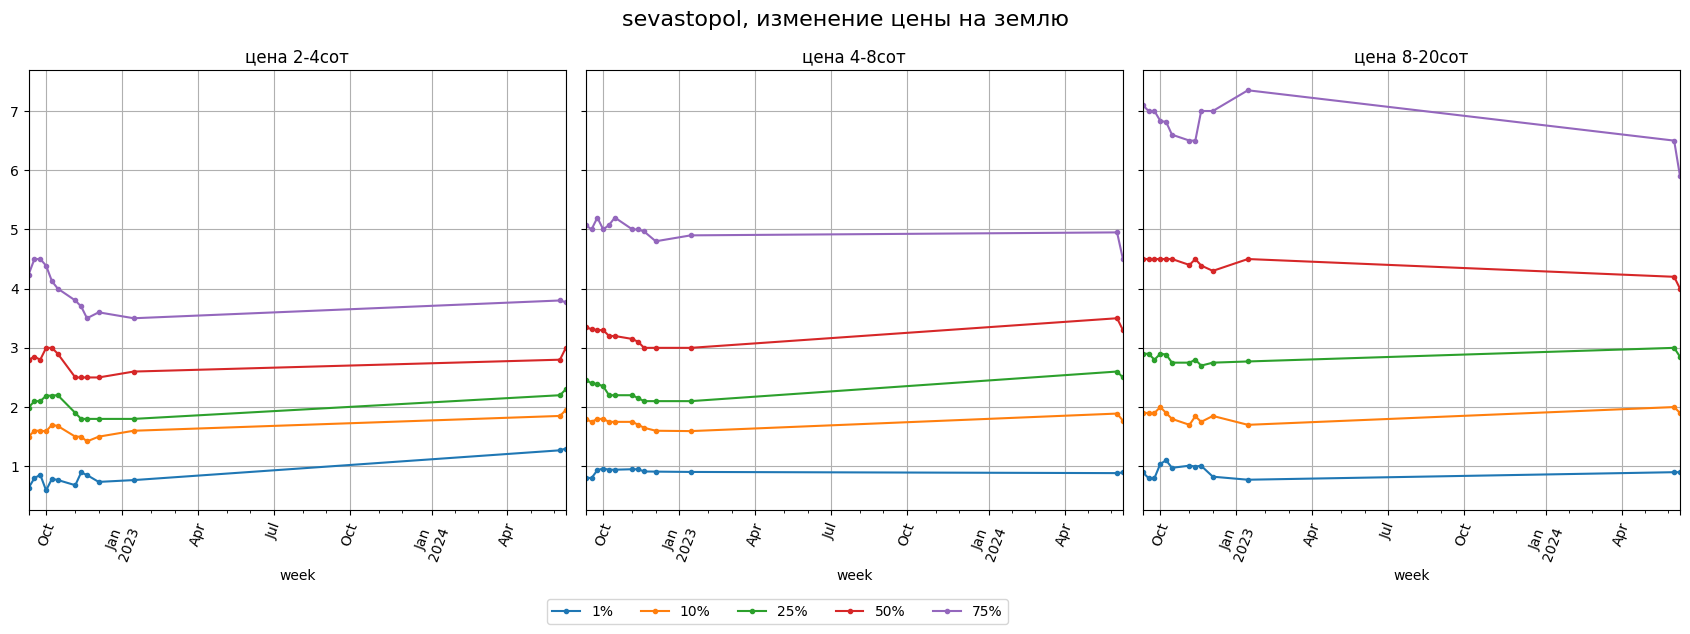

In [35]:
place = 'sevastopol'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

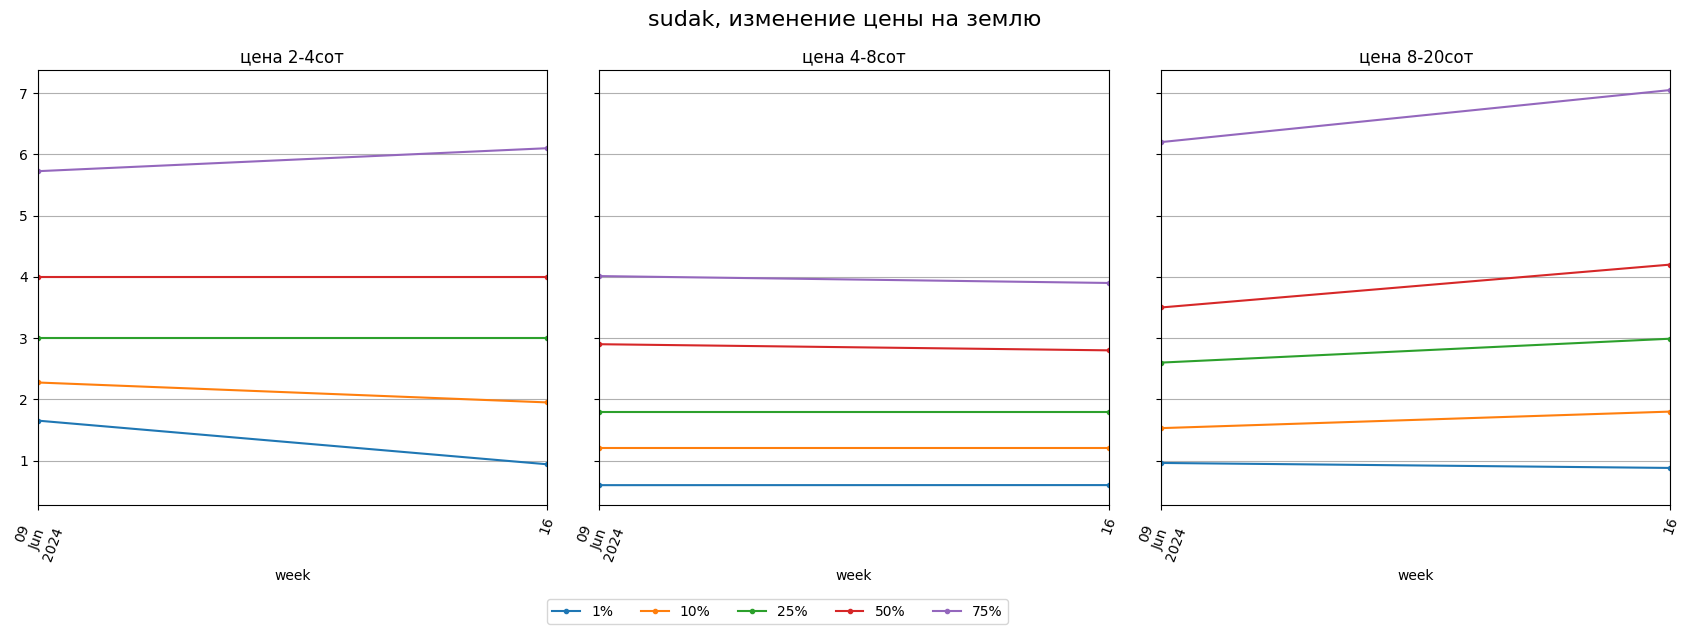

In [36]:
place = 'sudak'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

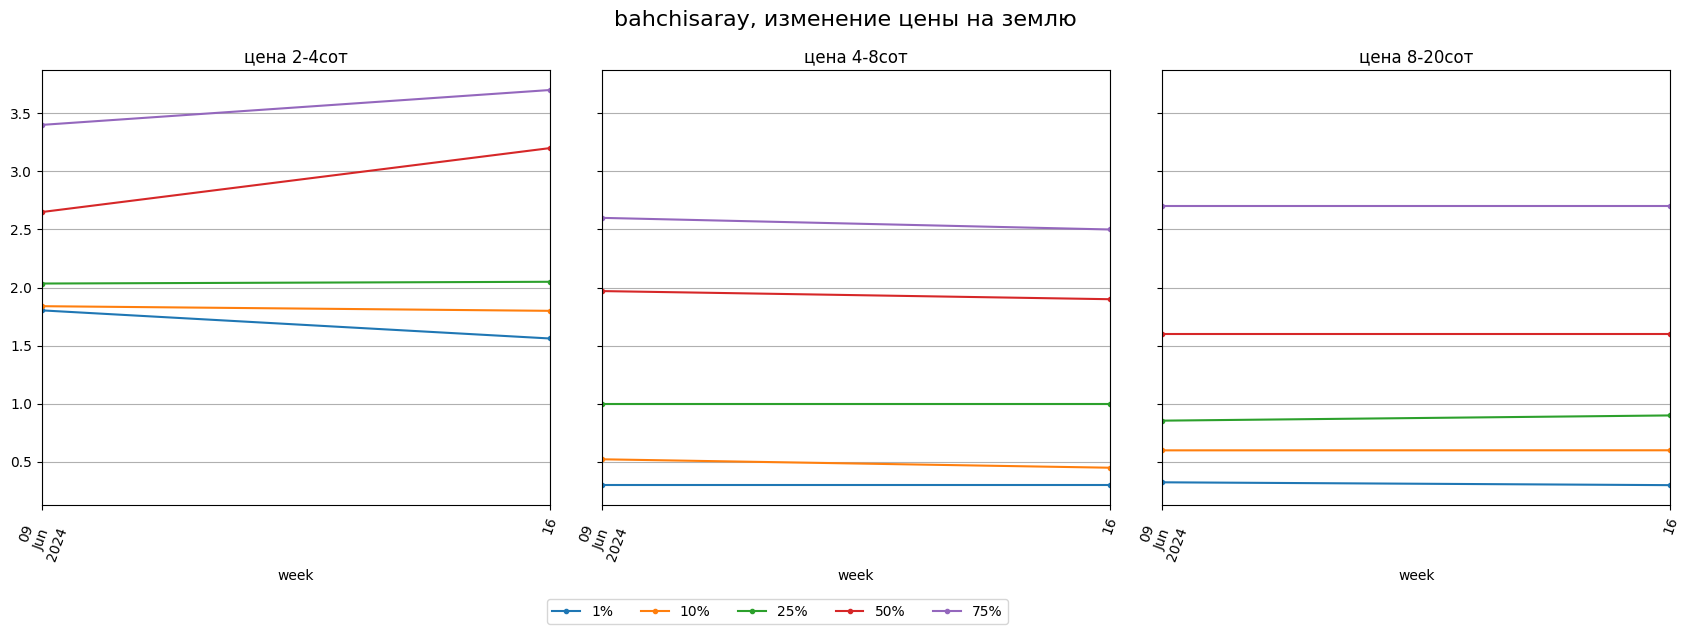

In [37]:
place = 'bahchisaray'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

# актуальная цена

In [38]:
display(len(gdf))
gdf_last = gdf[ gdf['dt'] == gdf['dt'].max() ]
display(len(gdf_last))

36477

3564

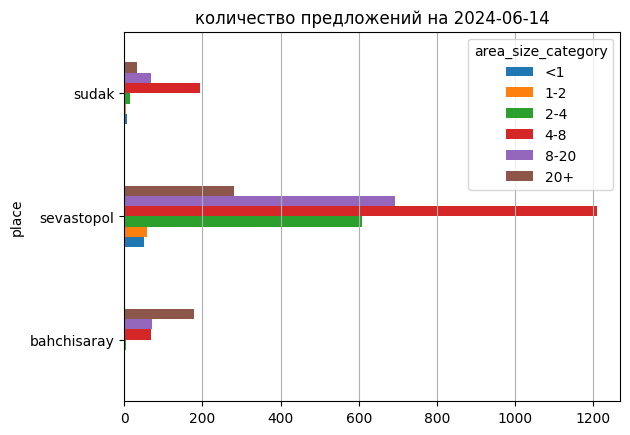

In [39]:
(
gdf_last
.groupby(['area_size_category','place'],observed=False)['url'].count().reset_index()
.pivot(index='place', columns='area_size_category', values='url')
.plot.barh(title='количество предложений на '+ str( gdf['dt'].max() ))
.grid(axis='x')    
)

In [40]:
(
    gdf_last
    .groupby(['place','area_size_category'],observed=False)
    ['priceM'].describe(percentiles=percentiles)
)

count  mean   std  min   1%   5%  10%  25%  \
place       area_size_category                                                
bahchisaray <1                    1.00  0.80   NaN 0.80 0.80 0.80 0.80 0.80   
            1-2                   1.00  2.00   NaN 2.00 2.00 2.00 2.00 2.00   
            2-4                   6.00  3.18  1.74 1.50 1.51 1.57 1.65 1.82   
            4-8                  69.00  2.31  2.48 0.15 0.25 0.35 0.40 0.72   
            8-20                 70.00  2.37  2.84 0.23 0.28 0.35 0.54 0.85   
            20+                 179.00  3.97 10.29 0.00 0.00 0.29 0.45 0.80   
sevastopol  <1                   51.00  2.98  0.99 0.80 0.80 1.12 1.30 2.50   
            1-2                  59.00  3.20  1.28 0.55 0.81 1.27 1.86 2.25   
            2-4                 608.00  3.26  1.58 0.65 1.30 1.80 1.97 2.30   
            4-8                1208.00  3.84  2.28 0.35 0.90 1.35 1.80 2.50   
            8-20                692.00  5.29  7.08 0.75 0.95 1.50 1.90 2.85   
            20+                 282.00  7.35 17.13 0.00 0.48 1.30 1.81 2.60   
sudak       <1                    8.00  1.24  1.03 0.50 0.50 0.52 0.54 0.62   
            1-2                   4.00  4.12  2.07 2.00 2.03 2.15 2.30 2.75   
            2-4                  16.00  5.61  4.91 0.94 1.04 1.44 1.77 2.90   
            4-8                 194.00  3.45  3.06 0.50 0.79 1.10 1.27 1.91   
            8-20                 69.00  6.47  7.22 0.88 0.96 1.14 1.76 2.70   
            20+                  34.00 10.54  8.13 0.80 1.03 2.02 3.08 4.58   

                                50%   75%   90%   95%    max  
place       area_size_category                                
bahchisaray <1                 0.80  0.80  0.80  0.80   0.80  
            1-2                2.00  2.00  2.00  2.00   2.00  
            2-4                2.75  4.28  5.15  5.47   5.80  
            4-8                1.90  2.50  4.64  6.94  15.50  
            8-20               1.50  2.70  3.96  8.07  16.20  
            20+                1.50  3.00  7.05 15.00 100.00  
sevastopol  <1                 3.15  3.70  4.00  4.25   4.90  
            1-2                3.20  3.92  4.61  5.36   7.00  
            2-4                3.00  3.75  4.50  6.00  14.00  
            4-8                3.30  4.50  6.40  8.00  28.50  
            8-20               4.00  5.60  8.70 12.33 120.00  
            20+                3.50  4.57 11.00 21.04 157.50  
sudak       <1                 0.80  1.50  2.13  2.86   3.60  
            1-2                3.90  5.28  6.13  6.41   6.70  
            2-4                3.85  6.12 11.25 14.38  20.00  
            4-8                2.77  3.70  6.00  8.00  30.00  
            8-20               4.20  7.35 11.50 19.60  50.30  
            20+                7.40 15.45 21.70 28.05  30.00

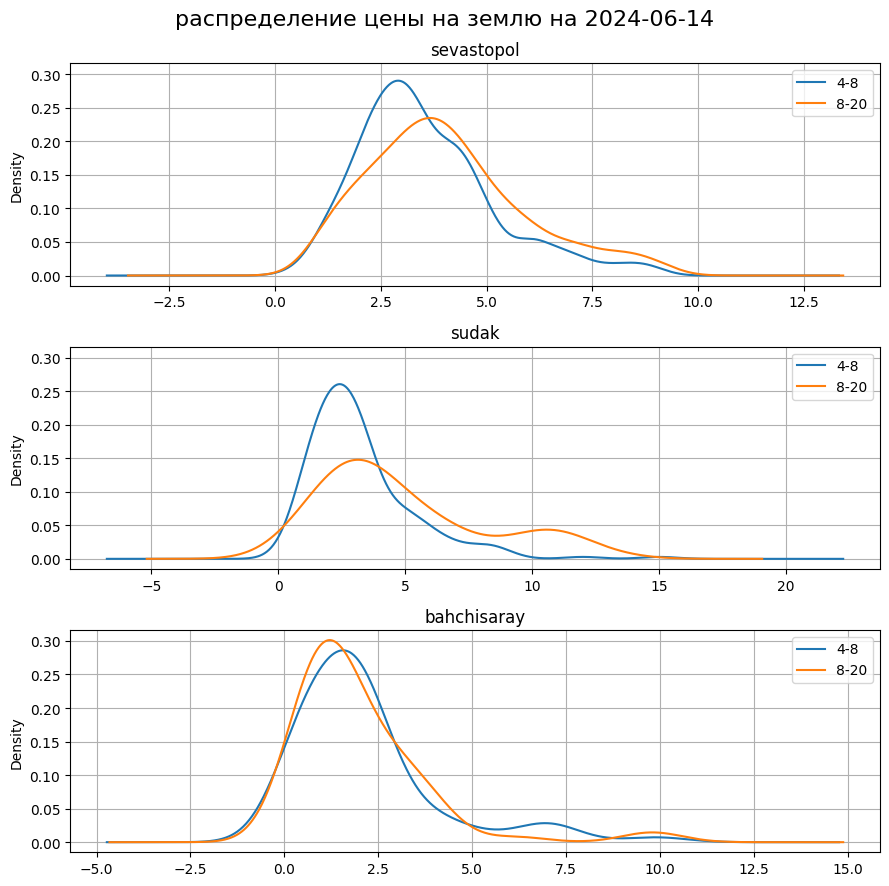

In [41]:
q_95 = gdf_last.groupby(['place'])['priceM'].quantile(.95)

places = ['sevastopol','sudak','bahchisaray']
# category = ['4-8', '8-20', '20+', '2-4', '1-2', NaN, '<1']
category = ['4-8', '8-20']

fig, ax = plt.subplots(len(places),1,figsize=(9,9), sharey=True )
for i,p in enumerate(places): 
    (
        gdf_last
        .query(f'(place=="{p}")&(priceM<{q_95[p]})&(area_size_category in {category})')
        .groupby(['area_size_category'],observed=True)
        ['priceM']
        .plot.kde(legend=True,ax=ax[i],title=f'{p}', grid=True)   
    )
fig.suptitle(f'распределение цены на землю на '+ str( gdf_last['dt'].max() ), fontsize=16)
fig.tight_layout()

# цены на карте

In [42]:
import h3
from shapely.geometry import Polygon
from shapely.geometry import MultiPoint

In [43]:
def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

In [44]:
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# gdf_last.query('place=="sevastopol"')[cols]

In [45]:
# gdf_last[gdf_last['place']=='sevastopol'][cols]

## Севастополь

In [46]:
frame_sevastopol = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf_last.query('place=="sevastopol"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

frame_sevastopol.explore()

In [47]:
# gdf_last.query('place=="sevastopol"')[['priceM']].describe([.9,.95,.99]).T

In [48]:
grid = cover_grid_hexagonal( frame_sevastopol.geometry.values[0],cell_size=7 )
grid_values = ( 
    grid
    # .sjoin( gdf_last.query('(place=="sevastopol")&(priceM<10.0)'), how='inner',)
    .sjoin( gdf_last.query('place=="sevastopol"'), how='inner',)
    .groupby(['hex_id'])
    [['log_priceM','priceM']]
    .median()
    .reset_index()
)

(
    grid
    .merge(grid_values,on='hex_id')
    [['priceM','geometry','log_priceM',]]
    .explore(column='log_priceM',cmap='rainbow')
)

## Судак

In [49]:
frame_sudak = gpd.GeoDataFrame([{ # все предложения
            'place':'sudak', 
            'geometry':MultiPoint( gdf_last.query('place=="sudak"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

In [50]:
# gdf_last.query('place=="sudak"')[['priceM']].describe([.9,.95,.99]).T

In [51]:
grid = cover_grid_hexagonal( frame_sudak.geometry.values[0],cell_size=8 )
grid_values = ( 
    grid
    .sjoin( gdf_last.query('place=="sudak"'), how='inner',)
    .groupby(['hex_id'])
   [['log_priceM','priceM']]
    .median()
    .reset_index()
)

(
    grid
    .merge(grid_values,on='hex_id')
    [['priceM','geometry','log_priceM',]]
    .explore(column='log_priceM',cmap='rainbow')
)

# районы Севастополя

In [52]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
        { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
        for nm,f in frames_index.values
    ],crs='epsg:4326',)

In [53]:
display(frames)

area_name  \
0     Севастополь, район Острякова   
1  Севастополь, парк 60-летия СССР   
2  Севастополь, Хрусталёва/Хрюкина   
3  Севастополь, Геловани/Коломийца   
4     Севастополь, Музыки/Бирюзова   
5   Севастополь, кр.горка (старый)   
6    Севастополь, кр.горка (новый)   
7      Севастополь, Малахов курган   
8       Севастополь, Благополучный   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        geometry  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                          POLYGON ((33.51618 44.58832, 33.52597 44.58817, 33.53399 44.57315, 33.54248 44.55177, 33.52583 44.55023, 33.51174 44.57861, 33.51253 44.58565, 33.51253 44.58565, 33.51618 44.58832))  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   POLYGON ((33.51805 44.58404, 33.51458 44.58408, 33.51263 44.58031, 33.51435 44.57460, 33.52004 44.57520, 33.51805 44.58404))  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             POLYGON ((33.52003 44.57511, 33.52527 44.56364, 33.52116 44.56136, 33.51942 44.56406, 33.51951 44.56384, 33.51874 44.56882, 33.51426 44.57444, 33.52003 44.57511))  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             POLYGON ((33.52139 44.57296, 33.53034 44.57518, 33.53318 44.57413, 33.53369 44.57139, 33.53244 44.56878, 33.53123 44.56774, 33.52440 44.56640, 33.52139 44.57296))  
4                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [54]:
frames.explore('area_name', legend=True)

In [55]:
area_name=[
    #'Севастополь, парк 60-летия СССР',
    #'Севастополь, Хрусталёва/Хрюкина',
    #'Севастополь, район Острякова',
    #'Севастополь, Малахов курган',
    'Севастополь, кр.горка (старый)',
    'Севастополь, кр.горка (новый)',
    'Севастополь, Благополучный',
    ]

In [56]:
# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

# фильтруем данные по области
gdf_last_local = gdf_last.sjoin( frame_, how='inner', predicate='within') 
gdf_last_local[['title','priceM','address','geometry']].explore( legend=False)

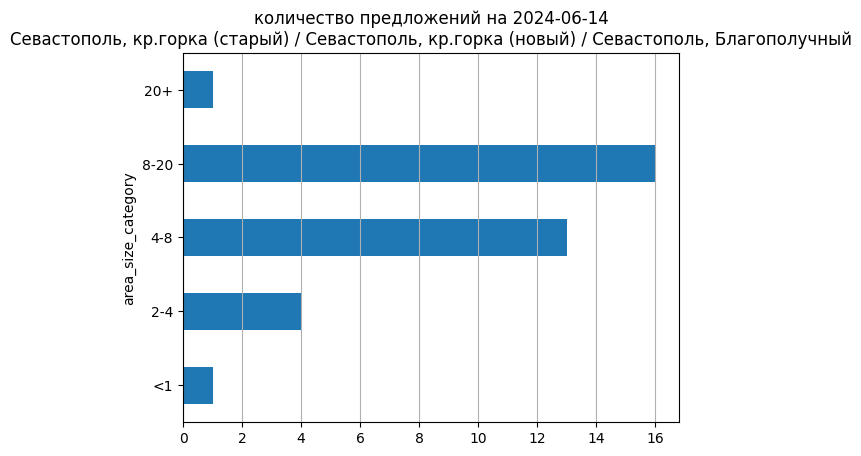

In [57]:
(
        gdf_last_local
        .groupby(['area_size_category'], observed=True)['url'].count()
        .plot.barh(title='количество предложений на '+ str( gdf['dt'].max()) + '\n' + ' / '.join(area_name) )
        .grid(axis='x')    
    )

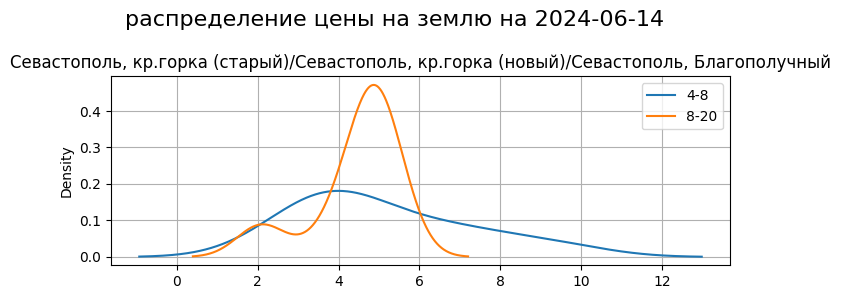

In [58]:
q_95 = gdf_last_local['priceM'].quantile(.95)

fig, ax = plt.subplots(figsize=(7,3) )
(
    gdf_last_local
    .query(f'(priceM<{q_95})&(area_size_category in {category})')
    .groupby(['area_size_category'],observed=True)
    ['priceM'].plot.kde(legend=True,ax=ax,title='/'.join(area_name), grid=True)   
)
fig.suptitle(f'распределение цены на землю на '+ str( gdf_last_local['dt'].max() ), fontsize=16)
fig.tight_layout()

----

In [59]:
# изменение цены по району
gdf_local = gdf.sjoin( frame_, how='inner', predicate='within') 

In [60]:
# percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = gdf_local.groupby(['area_size_category','week'],observed=True)['priceM'].describe(percentiles=percentiles)
# stat = gdf_local.groupby(['area_size_category','month'],observed=True)['priceM'].describe(percentiles=percentiles)
display( stat )

count  mean  std  min   1%   5%  \
area_size_category week                                                     
<1                 2024-06-03/2024-06-09   1.00  3.70  NaN 3.70 3.70 3.70   
                   2024-06-10/2024-06-16   3.00  3.70 0.00 3.70 3.70 3.70   
2-4                2022-09-05/2022-09-11   8.00  3.28 1.36 2.45 2.46 2.50   
                   2022-09-12/2022-09-18  29.00  2.81 0.40 2.45 2.45 2.45   
                   2022-09-19/2022-09-25  16.00  2.72 0.43 1.90 1.98 2.31   
                   2022-09-26/2022-10-02   6.00  2.72 0.58 1.90 1.93 2.07   
                   2022-10-03/2022-10-09   8.00  2.65 0.54 1.90 1.92 2.02   
                   2022-10-10/2022-10-16   8.00  2.60 0.56 1.90 1.92 2.00   
                   2022-10-31/2022-11-06  18.00  2.60 0.49 2.00 2.02 2.08   
                   2022-11-07/2022-11-13   9.00  2.60 0.51 2.00 2.02 2.08   
                   2022-11-14/2022-11-20  10.00  2.61 0.46 2.00 2.03 2.16   
                   2022-11-28/2022-12-04   8.00  2.54 0.50 2.00 2.02 2.12   
                   2023-01-09/2023-01-15   6.00  2.50 0.65 1.90 1.90 1.92   
                   2024-06-03/2024-06-09   8.00  4.34 1.95 1.80 1.87 2.15   
                   2024-06-10/2024-06-16  14.00  4.22 2.11 1.80 1.80 1.80   
4-8                2022-09-05/2022-09-11  26.00  3.88 2.06 1.60 1.65 1.80   
                   2022-09-12/2022-09-18 111.00  3.58 1.67 1.45 1.45 1.80   
                   2022-09-19/2022-09-25  55.00  3.66 1.64 1.45 1.45 1.80   
                   2022-09-26/2022-10-02  24.00  3.59 1.55 1.80 1.80 1.80   
                   2022-10-03/2022-10-09  28.00  3.70 1.56 1.80 1.80 1.85   
                   2022-10-10/2022-10-16  26.00  3.73 1.56 1.80 1.84 1.96   
                   2022-10-31/2022-11-06  48.00  3.59 1.47 1.80 1.80 1.95   
                   2022-11-07/2022-11-13  22.00  3.55 1.47 1.70 1.72 1.81   
                   2022-11-14/2022-11-20  24.00  3.63 1.67 1.60 1.62 1.72   
                   2022-11-28/2022-12-04  25.00  3.87 1.93 1.60 1.62 1.75   
                   2023-01-09/2023-01-15  14.00  3.76 1.38 1.50 1.56 1.82   
                   2024-06-03/2024-06-09  34.00  5.26 2.82 2.45 2.45 2.45   
                   2024-06-10/2024-06-16  54.00  5.29 2.74 2.45 2.45 2.45   
8-20               2022-09-05/2022-09-11  15.00  6.51 4.18 2.50 2.57 2.85   
                   2022-09-12/2022-09-18  58.00  6.31 3.73 2.15 2.15 2.94   
                   2022-09-19/2022-09-25  27.00  6.71 4.19 2.15 2.15 2.40   
                   2022-09-26/2022-10-02  14.00  6.29 4.19 2.15 2.26 2.70   
                   2022-10-03/2022-10-09   9.00  4.84 1.71 2.90 2.91 2.94   
                   2022-10-10/2022-10-16  11.00  5.53 3.33 2.90 2.90 2.90   
                   2022-10-31/2022-11-06  23.00  5.25 3.25 2.90 2.90 2.90   
                   2022-11-07/2022-11-13  11.00  5.50 4.85 2.90 2.96 3.20   
                   2022-11-14/2022-11-20   9.00  5.11 2.96 2.60 2.62 2.72   
                   2022-11-28/2022-12-04  12.00  4.95 2.50 2.90 2.97 3.23   
                   2023-01-09/2023-01-15   9.00  5.89 4.04 2.50 2.52 2.62   
                   2024-06-03/2024-06-09  41.00  6.30 3.92 2.10 2.10 2.10   
                   2024-06-10/2024-06-16  62.00  5.71 3.63 2.10 2.10 2.10   
20+                2024-06-03/2024-06-09   1.00  4.50  NaN 4.50 4.50 4.50   
                   2024-06-10/2024-06-16   3.00  4.50 0.00 4.50 4.50 4.50   

                                          10%  25%  50%  75%   90%   95%   max  
area_size_category week                                                         
<1                 2024-06-03/2024-06-09 3.70 3.70 3.70 3.70  3.70  3.70  3.70  
                   2024-06-10/2024-06-16 3.70 3.70 3.70 3.70  3.70  3.70  3.70  
2-4                2022-09-05/2022-09-11 2.56 2.60 2.67 3.17  4.54  5.52  6.50  
                   2022-09-12/2022-09-18 2.45 2.60 2.65 3.00  3.70  3.70  3.70  
                   2022-09-19/2022-09-25 2.52 2.60 2.62 2.70  3.25  3.70  3.70  
         

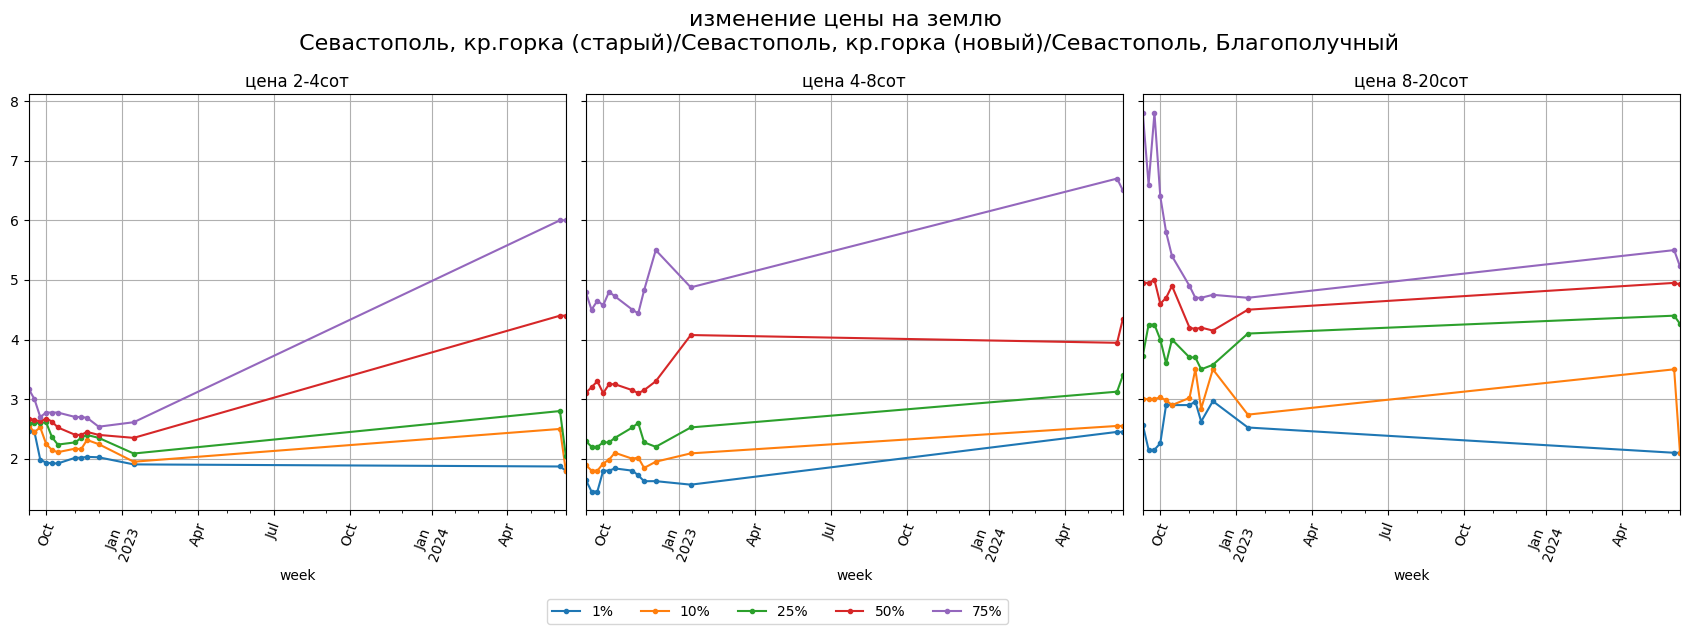

In [61]:
fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'изменение цены на землю\n {'/'.join(area_name)}', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()